In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
# Figure out how to import regularizers
###
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [4]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
#	print(tokenizer.texts_to_sequences([line]))
	token_list = tokenizer.texts_to_sequences([line])[0]
#	print(token_list)
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2020-05-03 07:46:12--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.143.128, 2a00:1450:4013:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.143.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2020-05-03 07:46:12 (96.4 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [7]:
model = Sequential()
model.add(Embedding(total_words,100,input_length=max_sequence_len-1))
model.add(LSTM(200,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(512,kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
# Pick an optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 10, 100)           321100    
_________________________________________________________________
lstm_2 (LSTM)                (None, 10, 200)           240800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 200)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               120400    
_________________________________________________________________
dense (Dense)                (None, 512)               51712     
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              1647243   
Total params: 2,381,255
Trainable params: 2,381,255
Non-trainable params: 0
____________________________________________

In [8]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 5s 10ms/step - loss: 7.0687 - accuracy: 0.0209
Epoch 2/100
484/484 [==============================] - 5s 10ms/step - loss: 6.5222 - accuracy: 0.0211
Epoch 3/100
484/484 [==============================] - 5s 10ms/step - loss: 6.4521 - accuracy: 0.0257
Epoch 4/100
484/484 [==============================] - 5s 10ms/step - loss: 6.3525 - accuracy: 0.0266
Epoch 5/100
484/484 [==============================] - 5s 10ms/step - loss: 6.2790 - accuracy: 0.0314
Epoch 6/100
484/484 [==============================] - 5s 10ms/step - loss: 6.2085 - accuracy: 0.0374
Epoch 7/100
484/484 [==============================] - 5s 10ms/step - loss: 6.1356 - accuracy: 0.0392
Epoch 8/100
484/484 [==============================] - 5s 10ms/step - loss: 6.0575 - accuracy: 0.0438
Epoch 9/100
484/484 [==============================] - 5s 10ms/step - loss: 5.9658 - accuracy: 0.0449
Epoch 10/100
484/484 [==============================] - 5s 10ms/step - loss: 5.860

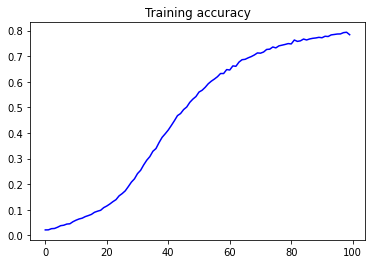

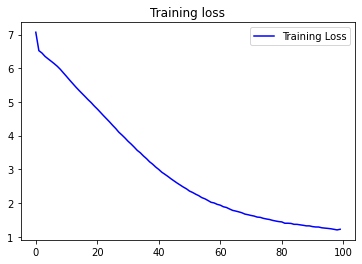

In [10]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [12]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 10
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope his sickle and shore effect back dead pride 'will' it
